### 계단 오르내리기 

- 계단 중간에서 같은 확률로 1계단씩 올라가거나 내려감

- 파이썬 사용

In [1]:
import random

position = 0
walk = [position]
steps = 1000

for i in range(steps) :
    step = 1 if random.randint(0,1) else -1   
        # random. randint ( a , b ) 
        # a <= N <= b 되도록 임의의 정수 N을 반환합니다.
        # 0이 나오면 False, 이외의 값은 True
    position += step
    walk.append(position)

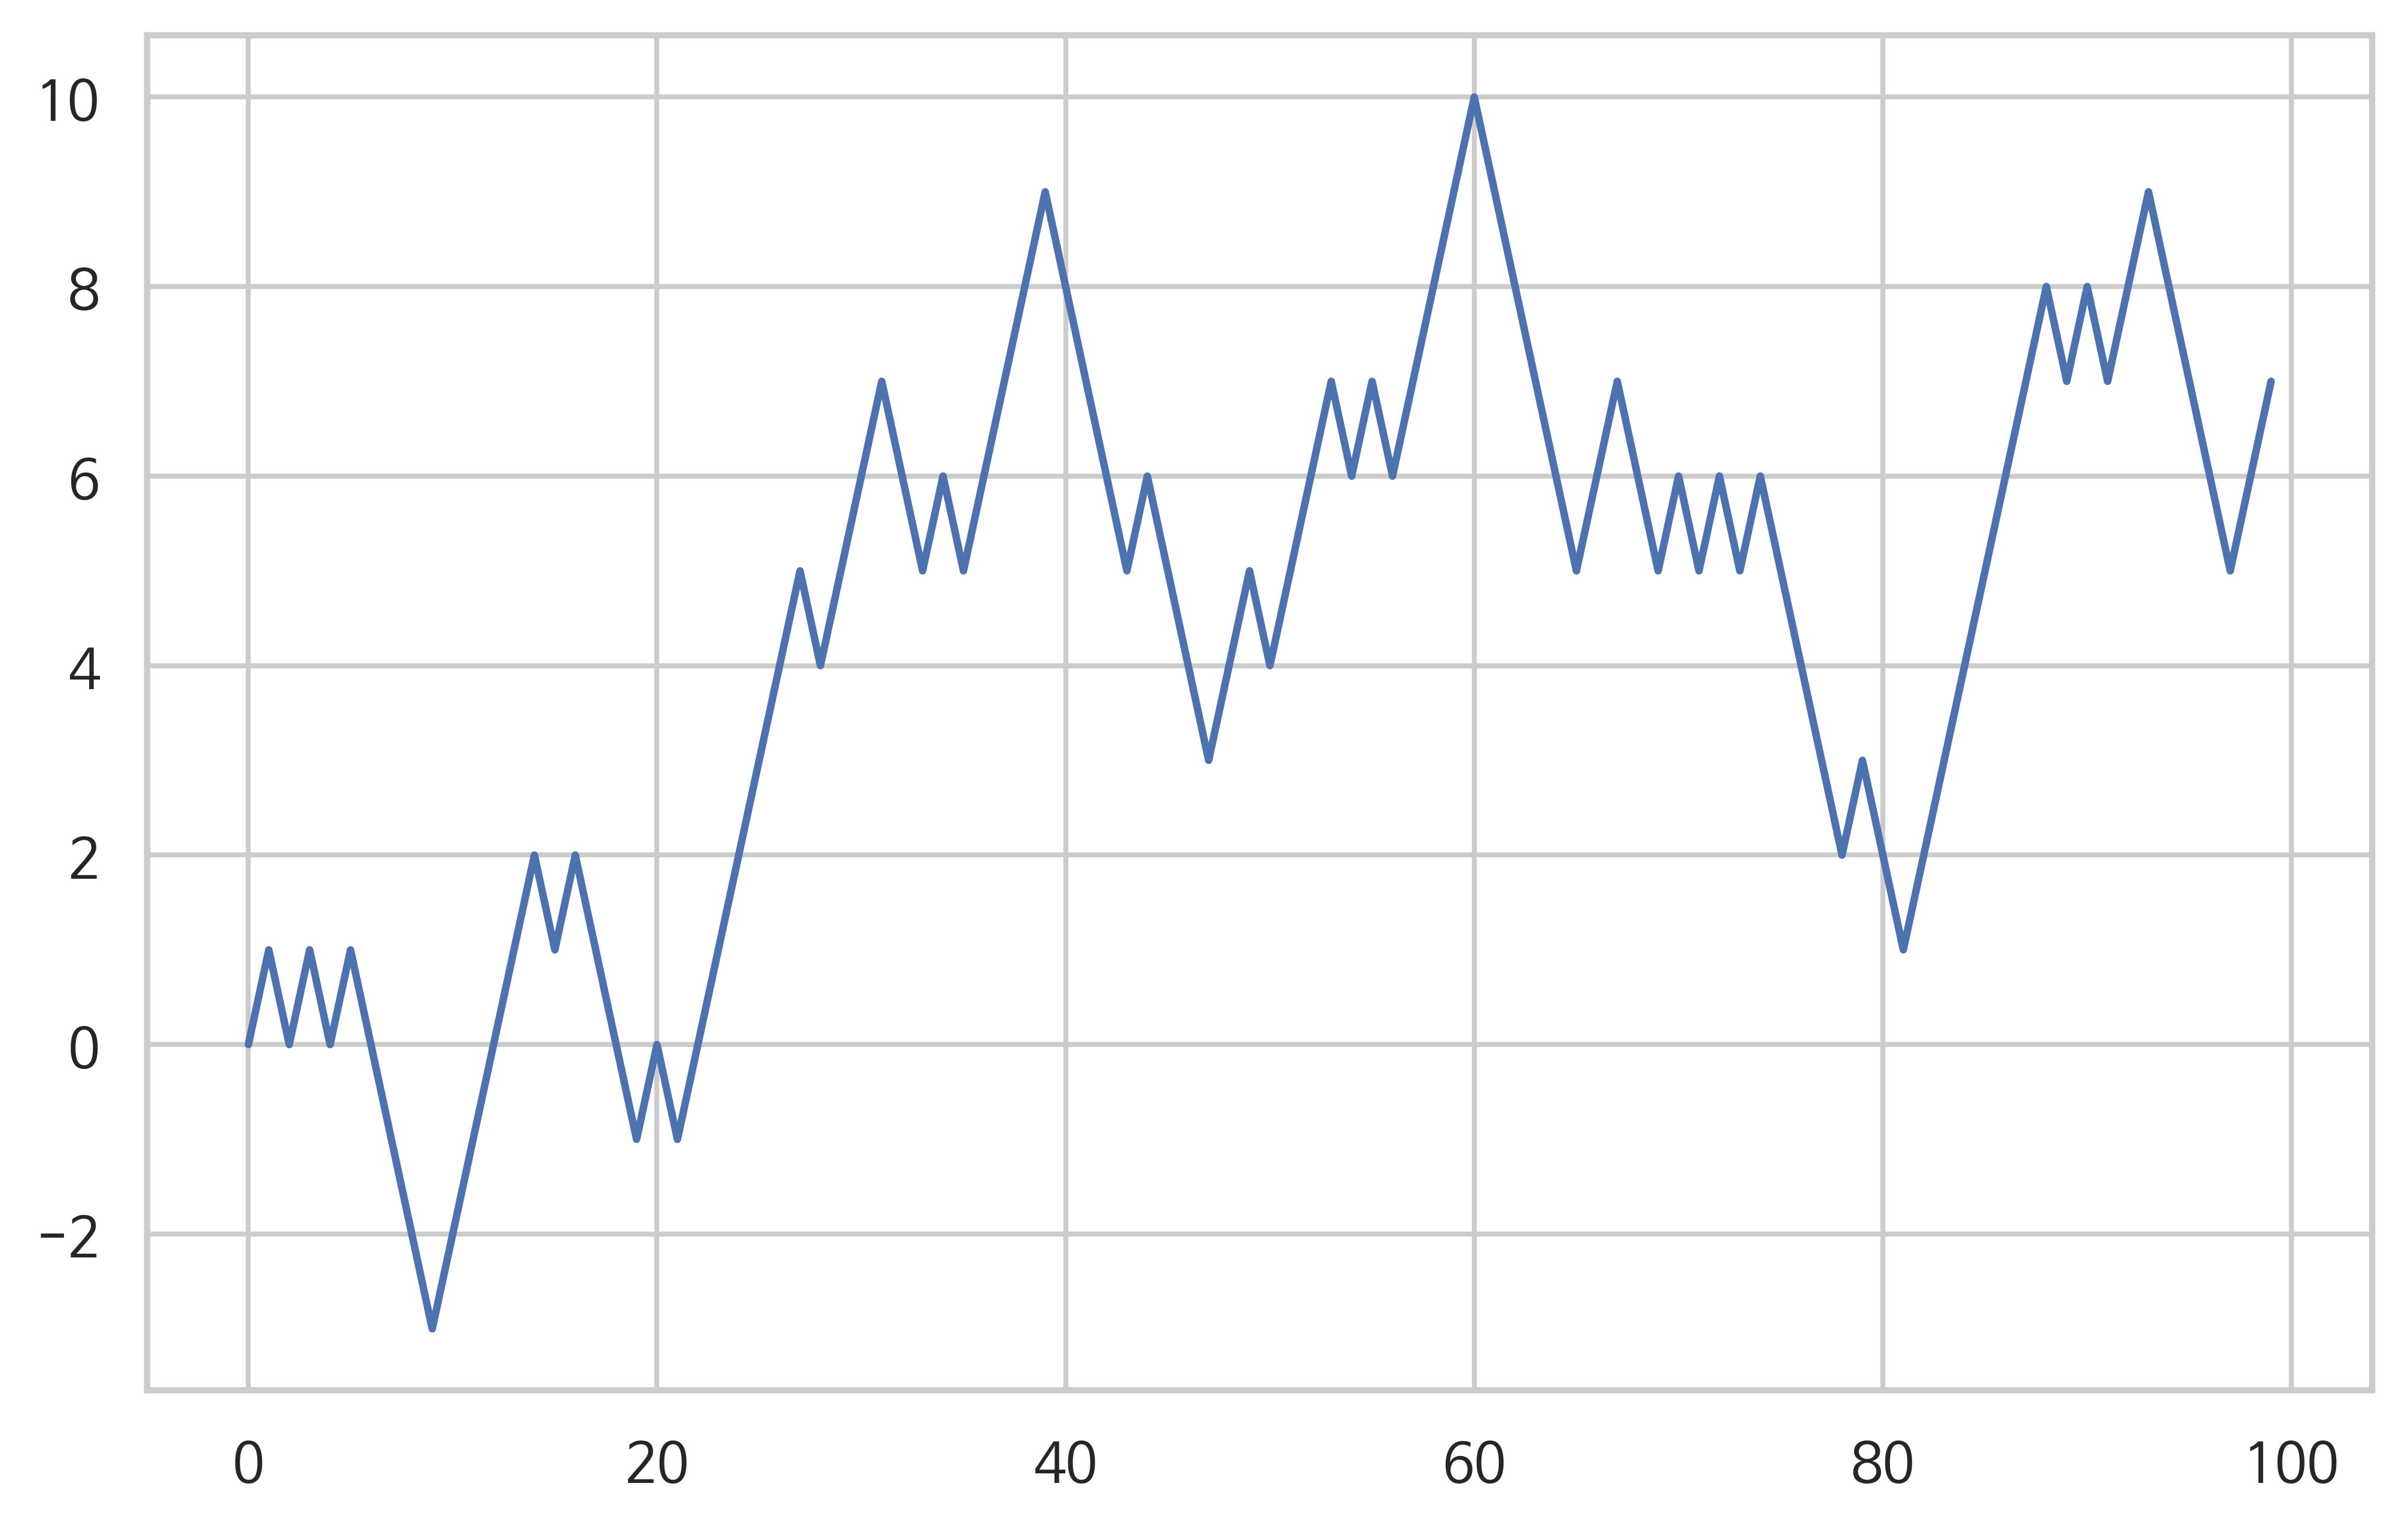

In [2]:
plt.plot(walk[:100])

- np.random 사용

In [3]:
nsteps = 1000

draws = np.random.randint(0,2, size=nsteps)
    # np.random. randint ( a , b ) 
    # a <= N < b 되도록 임의의 정수 N을 반환합니다.

steps = np.where(draws > 0, 1, -1)

walk = steps.cumsum()

계단 오르 내린 위치의 최소/ 최대값

In [4]:
walk.min()

-55

In [5]:
walk.max()

15

계단의 처음 위치에서 최초로 10칸 떨어지기까지 얼마나 걸리는지(시점)
최초의 10또는 -10인 지점을 구해야하므로 불리언 배열에서 최대값의 처음 색인을 반환하는 `argmax`사용(True가 최대값)

In [6]:
(np.abs(walk)>=10).argmax()

109

#### 한번에 시뮬레이션

In [7]:
nwalks = 5000

nsteps = 1000

draws = np.random.randint(0,2, size= (nwalks, nsteps)) # 0 or 1

steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(1)  # 같은 row끼리의 누적 합

In [8]:
walks

array([[  1,   0,   1, ...,   2,   1,   0],
       [ -1,  -2,  -1, ..., -22, -23, -24],
       [ -1,  -2,  -1, ...,  -8,  -7,  -8],
       ...,
       [  1,   2,   1, ...,  56,  55,  54],
       [ -1,  -2,  -1, ...,  62,  63,  64],
       [ -1,   0,  -1, ...,  54,  55,  56]])

- 모든 시뮬레이션에서의 최소/최대값

In [9]:
walks.max()

111

In [10]:
walks.min()

-113

- 누적합이 30 혹은 -30이 되는 최소 시점(`any`메소드 사용)

In [11]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True, False, ...,  True,  True,  True])

In [12]:
hits30.sum()#누적합이 30 또는 -30이 되는 경우의 수

3374

- 이 불리언 배열로 walks에서 칼럼을 선택하고 절대값이 30이 넘는 경우에 대해 축 1의 argmax값 구하면 처음 위치에서 30칸 이상 멀어지는 최소 횟수 구할 수 있음

In [13]:
crossing_times = (np.abs(walks[hits30])>=30).argmax(1)
crossing_times.mean()

500.1286307053942

- normal함수의 표준 편차와 평균값으로 정류분포에서 표본 추출하는 것처럼 난수 발생 함수 생성

In [14]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

In [15]:
steps = np.where(steps > 0, 1, -1)

In [16]:
walks = steps.cumsum(1)

In [17]:
walks

array([[  1,   0,  -1, ...,   4,   3,   4],
       [ -1,   0,   1, ...,  14,  13,  12],
       [  1,   2,   3, ..., -64, -63, -62],
       ...,
       [  1,   2,   3, ...,  10,  11,  10],
       [ -1,  -2,  -3, ...,   2,   1,   0],
       [  1,   0,  -1, ...,  -8,  -7,  -8]])

In [18]:
walks.max()

124

In [19]:
walks.min()

-108

In [20]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ..., False, False,  True])

In [21]:
hits30.sum()

3397

In [22]:
crossing_times = (np.abs(walks[hits30])>=30).argmax(1)
crossing_times.mean()

499.52987930526933

참고 자료
> Python for Data Analysis(2019), 한빛미디어  
>[ 파이썬 표준 라이브러리](https://translate.googleusercontent.com/translate_c?depth=1&hl=ko&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://docs.python.org/2/library/random.html&xid=17259,15700022,15700186,15700190,15700256,15700259,15700262,15700265&usg=ALkJrhjjMmKr8CDjOCkFl19QH_fANfJCEQ#random.randint)  
>[python의 random모듈 3가지 정리](https://nittaku.tistory.com/443)